# **Libreta de Misael**

In [ ]:
import gdown
import pandas as pd
import os
import sys
import zipfile as zip
import geopandas as gpd
import urllib.request as ur
import matplotlib.pyplot as plt
!pip install mapclassify

#
from bs4 import BeautifulSoup as bs
import requests

# **1 Descargar datos**


## **1.1 descargar datos de delitos**

Descargar los datos de delitos usando el link a google drive que aparece en la pagina https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva

In [ ]:
# url_delitos = 'https://drive.google.com/u/0/uc?id=1Z2DduhVJB2_JRurPW6iVhR4tsnDjNREs&export=download'
# #descargamos zip con los datos y los guardamos en ./data/data.zip

# if not os.path.exists('./data'):
#   os.mkdir('./data')
#   gdown.download(url_delitos,'./data/data.zip')

# #Extraemos los archivos en el zip descargado a la carpeta data
# with zip.ZipFile('/content/data/data.zip',mode = 'r' ) as archivo:
#   archivo.extractall(path = './data/')
# #leemos csv
# df = pd.read_csv('/content/data/Municipal-Delitos-2015-2023_jul2023/Municipal-Delitos-2015-2023_jul2023.csv', encoding = 'iso-8859-1')

Descargar los datos de delitos obteniendo el link que aroja la pagina

In [ ]:
#Metodo usando BeautifulSopu para encontrar el link en el enlace general

url_general = r"https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva"
page = requests.get(url_general)
soup = bs(page.content, 'html.parser')
div = soup.find_all('div', class_='article-body')
links = div[0].find_all("a")
url_delitos = links[1]["href"]

#Una vez obtenido el enlace, descargar archivo con gdown
if os.path.exists('./data'):
  if not os.path.exists('./data/data_delitos.csv'):
    gdown.download(url_delitos, './data/data_delitos.csv', fuzzy=True)
else:
  os.mkdir('./data')
  gdown.download(url_delitos, './data/data_delitos.csv', fuzzy=True)



https://drive.google.com/file/d/13TjyJ9RkR49o0eWTFvhNqazeL4maORYp/view?usp=sharing


Una vez descargados los datos procedemos a leerlos y guardarlos en df_delitos

In [ ]:
df_delitos = pd.read_csv('/content/data/data_delitos.csv', encoding = 'iso-8859-1')

In [ ]:
df_delitos.rename(columns = {'Cve. Municipio':'clave_municipio'}, inplace = True)
df_delitos

,Año,Clave_Ent,Entidad,clave_municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075733,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075734,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075735,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075736,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


# **1.2 Descarga de datos poblacionales por municipio**

In [ ]:
url_poblacion = 'https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/iter/iter_00_cpv2020_csv.zip'

if os.path.exists('./data'):
  if not os.path.exists('./data/datos_poblacion.zip'):
    ur.urlretrieve(url_poblacion, './data/datos_poblacion.zip')
else:
  os.mkdir('./data')
  ur.urlretrieve(url_poblacion, './data/datos_poblacion.zip')


#extraemos
with zip.ZipFile('/content/data/datos_poblacion.zip', 'r') as archivo:
  archivo.extract(member = 'iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv', path = './data')

#movemos a raiz de carpeta data
if not os.path.exists('./data/data_poblacion.csv'):
  os.rename('/content/data/iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv', './data/data_poblacion.csv')

Leemos y guardamos datos de poblacion en df_poblacion

In [ ]:
df_poblacion = pd.read_csv('/content/data/data_poblacion.csv', usecols =  ['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC', 'NOM_LOC' ,'POBTOT'])

#Reducimos el data frame a municipios
df_poblacion = df_poblacion[df_poblacion['NOM_LOC'] == 'Total del Municipio']
df_poblacion

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT
6,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,948990
574,1,Aguascalientes,2,Asientos,0,Total del Municipio,51536
749,1,Aguascalientes,3,Calvillo,0,Total del Municipio,58250
918,1,Aguascalientes,4,Cosío,0,Total del Municipio,17000
985,1,Aguascalientes,5,Jesús María,0,Total del Municipio,129929
...,...,...,...,...,...,...,...
195372,32,Zacatecas,54,Villa Hidalgo,0,Total del Municipio,19446
195422,32,Zacatecas,55,Villanueva,0,Total del Municipio,31558
195542,32,Zacatecas,56,Zacatecas,0,Total del Municipio,149607
195616,32,Zacatecas,57,Trancoso,0,Total del Municipio,20455


Para poder trabajar con df_poblacion vamos a agregar una columna llamada clave_municipio, la cual va a realizar la funcion de foerign key con las demas tablas que usaremos y representa un primary key para cada municipio.

los elementos de la columna clave_municipio se compone por el número de estado concatenado con la clave  de municipio a 3 cifras como se muestra en df_delitos

In [ ]:
#cambiamos de tipo a la columna MUN y ENTIDAD para que sea un string y poder adecuaro al formato
df_poblacion[['ENTIDAD', 'MUN']] = df_poblacion[['ENTIDAD', 'MUN']].astype('str')

#Definimos funcion para agregar ceros al inicio de la columna MUN
def llenar_ceros3(string):
  if len(string) == 1:
    return 2 * '0' + string
  elif len(string) == 2:
    return '0' + string
  else:
    return string

#Agregamos ceros
for i in df_poblacion['ENTIDAD'].index:
  df_poblacion['MUN'].loc[i] = llenar_ceros3(df_poblacion['MUN'].loc[i])


#Agregamos columna CLAVE
df_poblacion['clave_municipio'] = df_poblacion['ENTIDAD'] + df_poblacion['MUN']


df_poblacion

<ipython-input-24-1acfc5044f27>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poblacion['MUN'].loc[i] = llenar_ceros3(df_poblacion['MUN'].loc[i])


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT,clave_municipio
6,1,Aguascalientes,001,Aguascalientes,0,Total del Municipio,948990,1001
574,1,Aguascalientes,002,Asientos,0,Total del Municipio,51536,1002
749,1,Aguascalientes,003,Calvillo,0,Total del Municipio,58250,1003
918,1,Aguascalientes,004,Cosío,0,Total del Municipio,17000,1004
985,1,Aguascalientes,005,Jesús María,0,Total del Municipio,129929,1005
...,...,...,...,...,...,...,...,...
195372,32,Zacatecas,054,Villa Hidalgo,0,Total del Municipio,19446,32054
195422,32,Zacatecas,055,Villanueva,0,Total del Municipio,31558,32055
195542,32,Zacatecas,056,Zacatecas,0,Total del Municipio,149607,32056
195616,32,Zacatecas,057,Trancoso,0,Total del Municipio,20455,32057


# **1. 3 Descargamos los datos geometricos  de México a nivel estado y municpial**


Usaremos la clase geopandas.GeoDataFrame para guardar los datos del archivo shp, la cual es una subclase de pandas.DataFrame que incorpora metodos para la graficación de objetos tipo poligono entre otras adecuaciones.

In [ ]:
url_datos_geograficos = 'https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463142683_s.zip'

if os.path.exists('./data'):
  if not os.path.exists('./data/data_mapa_mexico.zip'):
    ur.urlretrieve(url_datos_geograficos,'./data/data_mapa_mexico.zip')
else:
  os.mkdir('./data')
  ur.urlretrieve(url_datos_geograficos,'./data/data_mapa_mexico.zip')

#extraemos archivos necesarios shp, shx, cpg, dbf y prj (todos se necesitan aunque solo se lea el shp)
with zip.ZipFile('/content/data/data_mapa_mexico.zip') as archivo:
  #descargamos archivos de municipales
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_municipales.shp', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_municipales.CPG', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_municipales.shx', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_municipales.dbf', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_municipales.prj', path = './data/')
  #descargamos archivos de entidades
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.shp', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.CPG', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.shx', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.dbf', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.prj', path = './data/')

#movemos archivos a una mejor ubicacion
if not os.path.exists('./data/geoestadisticas_municipales/areas_geoestadisticas_municipales.shp'):
  os.mkdir('./data/geoestadisticas_municipales')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_municipales.shp', './data/geoestadisticas_municipales/areas_geoestadisticas_municipales.shp')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_municipales.shx', './data/geoestadisticas_municipales/areas_geoestadisticas_municipales.shx')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_municipales.CPG', './data/geoestadisticas_municipales/areas_geoestadisticas_municipales.CPG')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_municipales.dbf', './data/geoestadisticas_municipales/areas_geoestadisticas_municipales.dbf')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_municipales.prj', './data/geoestadisticas_municipales/areas_geoestadisticas_municipales.prj')

if not os.path.exists('./data/geoestadisticas_estatales/areas_geoestadisticas_estatales.shp'):
  os.mkdir('./data/geoestadisticas_estatales')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_estatales.shp', './data/geoestadisticas_estatales/areas_geoestadisticas_estatales.shp')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_estatales.shx', './data/geoestadisticas_estatales/areas_geoestadisticas_estatales.shx')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_estatales.CPG', './data/geoestadisticas_estatales/areas_geoestadisticas_estatales.CPG')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_estatales.dbf', './data/geoestadisticas_estatales/areas_geoestadisticas_estatales.dbf')
  os.rename('/content/data/conjunto_de_datos/areas_geoestadisticas_estatales.prj', './data/geoestadisticas_estatales/areas_geoestadisticas_estatales.prj')

#Guardamos poligonos municipales y estatales
gdf_datos_geograficos_mun = gpd.read_file('./data/geoestadisticas_municipales/areas_geoestadisticas_municipales.shp').to_crs(epsg=4485)
gdf_datos_geograficos_ent = gpd.read_file('./data/geoestadisticas_estatales/areas_geoestadisticas_estatales.shp').to_crs(epsg=4485)

#hacemos la columna clave_municipio en  gdf_datos_geograficos_mun
gdf_datos_geograficos_mun['clave_municipio'] = gdf_datos_geograficos_mun['CVE_ENT'].astype('int').astype('str')+gdf_datos_geograficos_mun['CVE_MUN']

# **2 Ejemplo uso de mapas** (no son los que vamos a usar, solo ejemplos)

##**2.1**
grafica de población municipal  a 14 intervalos (tambien se puede hacer con colores continuos quitando el schema y k)

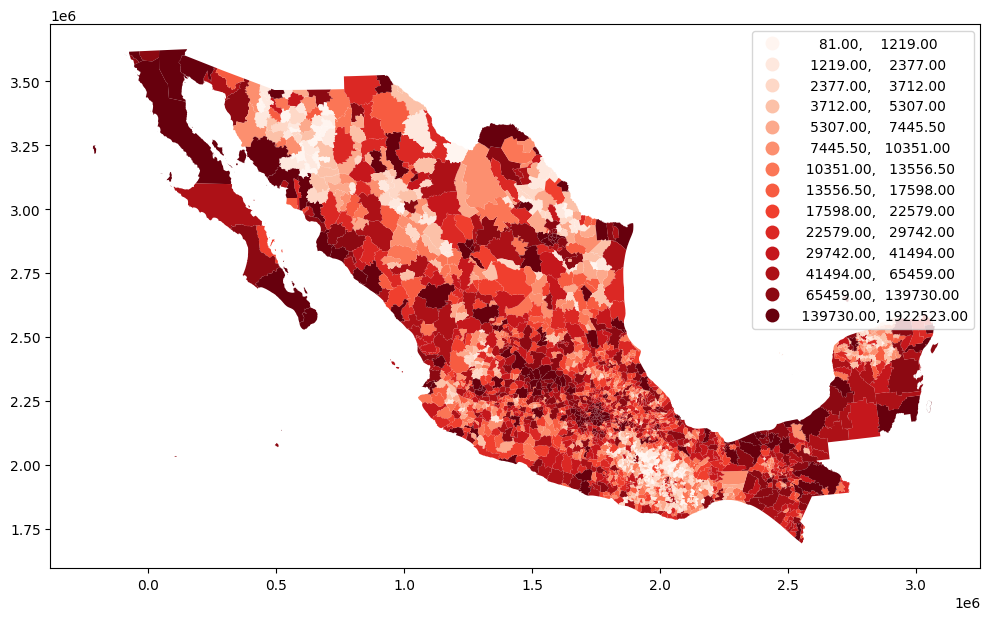

In [ ]:
#Hacemos merge a gdf_datos_geograficos_mun con df_poblacion para obtener la columa POBTOT acorde al municipio
gdf_geograficos_poblacion_mun = gdf_datos_geograficos_mun.join(df_poblacion.set_index('clave_municipio'),lsuffix = '_L',rsuffix = '_R', on = 'clave_municipio')

#conservamos columnas necesarias
gdf_geograficos_poblacion_mun = gdf_geograficos_poblacion_mun[['clave_municipio', 'geometry', 'POBTOT']]

#graficamos
fig, ax = plt.subplots()
gdf_geograficos_poblacion_mun['poblacion_total'] =df_poblacion['POBTOT']

gdf_geograficos_poblacion_mun.plot(column='POBTOT', scheme = 'quantiles', k = 14, legend=True, cmap='Reds', ax=ax)
fig.set_size_inches(12,12)

## **2.2**
Grafica de población estatal

<ipython-input-109-ba4faa7f6dcd>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  series_poblacion_estatal = df_poblacion_alt.groupby('ENTIDAD').sum()['POBTOT']


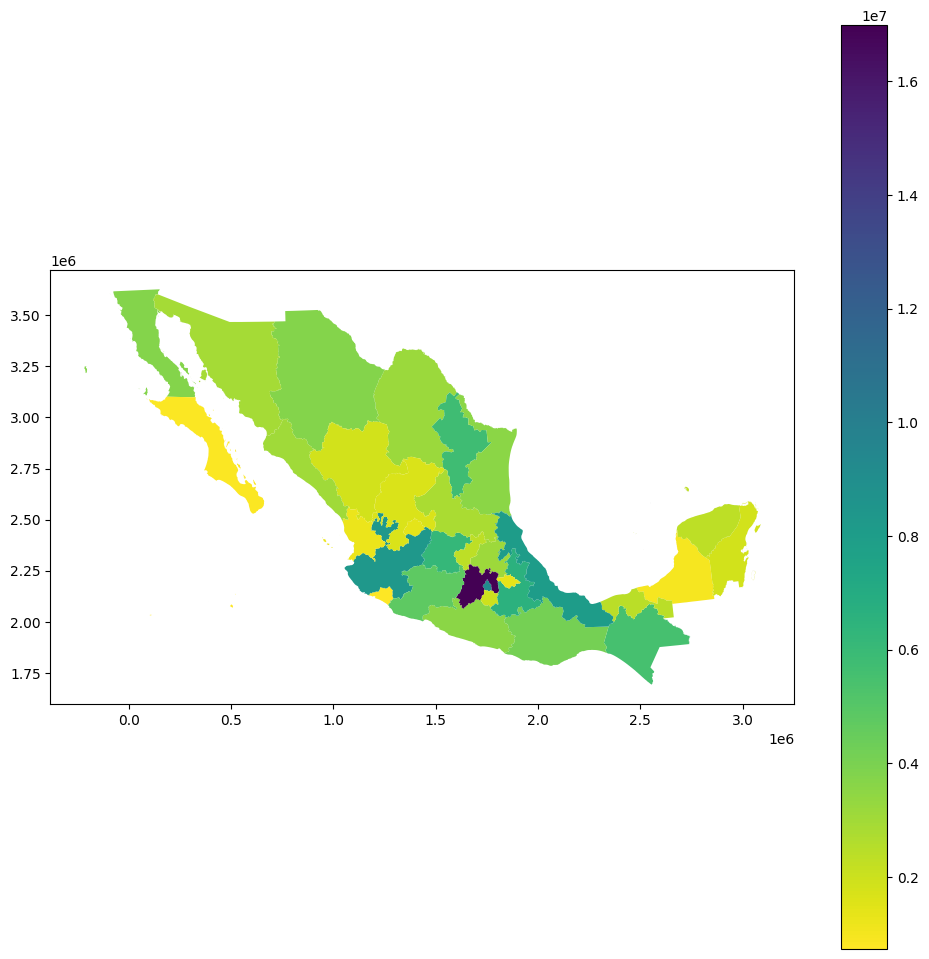

In [ ]:
#Hacemos data frame población estatal

#empezamos haciendo una copia de df_poblacion y cambiamos el tipo de la columna ENTIDAD a entero, ya que la columna de CVE_ENT de gdf_datos_geograficos_ent
#no incluye ceros al inicio para las entidades del 1 al 9

df_poblacion_alt  = df_poblacion
df_poblacion_alt['ENTIDAD'] = df_poblacion['ENTIDAD'].astype('int')

series_poblacion_estatal = df_poblacion_alt.groupby('ENTIDAD').sum()['POBTOT']

#cambiamos a int la CVE_ENT
gdf_datos_geograficos_ent['CVE_ENT'] = gdf_datos_geograficos_ent['CVE_ENT'].astype('int')

#merge
gdf_poblacion_estatal = gdf_datos_geograficos_ent.join(series_poblacion_estatal, on = 'CVE_ENT')

#graficamos
fig, ax = plt.subplots()


gdf_poblacion_estatal.plot(column='POBTOT', legend=True, cmap='viridis_r', ax=ax)
fig.set_size_inches(12,12)

## **2.3**
Grafica número de delitos (en general) por cada 100 habitantes 2015 hasta la fecha

Index(['CVE_ENT', 'NOM_ENT', 'geometry', 'delitos_totales', 'POBTOT'], dtype='object')


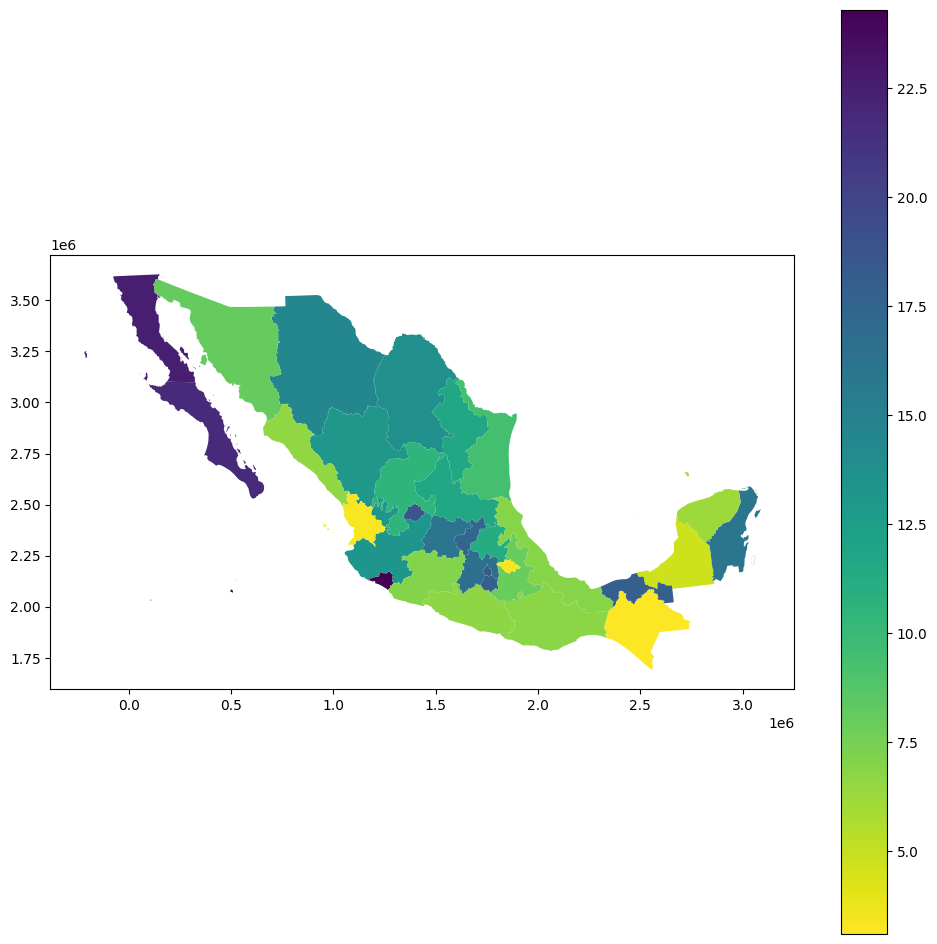

In [ ]:
#creamos data frame df_delitos_entidad el cual tiene el total de delitos por entidad
df_delitos['delitos_totales']=df_delitos['Enero']+df_delitos['Febrero']+df_delitos['Marzo']+df_delitos['Abril']+df_delitos['Mayo']+df_delitos['Junio']+df_delitos['Julio']+df_delitos['Agosto']+df_delitos['Septiembre']+df_delitos['Octubre']+df_delitos['Noviembre']+df_delitos['Diciembre']
df_delitos_entidad = df_delitos.groupby('Clave_Ent').agg({'delitos_totales':'sum'}).reset_index()

#creamos geodataframe con datos de delitos por entidad y los poligonos
gdf_entidad_delitos = gdf_datos_geograficos_ent.join(df_delitos_entidad.set_index('Clave_Ent'), on = 'CVE_ENT')

#agregamos columna de poblacion
gdf_entidad_delitos = gdf_entidad_delitos.join(series_poblacion_estatal, on = 'CVE_ENT' )

#
print(gdf_entidad_delitos.columns)
gdf_entidad_delitos['delitos_por_100_habitantes'] = 100 * gdf_entidad_delitos['delitos_totales'] / gdf_entidad_delitos['POBTOT']

#graficamos
fig, ax = plt.subplots()


gdf_entidad_delitos.plot(column='delitos_por_100_habitantes', legend=True, cmap='viridis_r', ax=ax)
fig.set_size_inches(12,12)